In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

model_unscaled = LogisticRegression()
model_unscaled.fit(X_train_unscaled, y_train)

LogisticRegression()

In [7]:
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Acurácia do modelo com normalização: {accuracy_scaled}")

y_pred_unscaled = model_unscaled.predict(X_test_unscaled)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Acurácia do modelo sem normalização: {accuracy_unscaled}")

Acurácia do modelo com normalização: 1.0
Acurácia do modelo sem normalização: 1.0


In [8]:


feature1_index = 0  
feature2_index = 1  


X_train_2d = X_train_scaled[:, [feature1_index, feature2_index]]


model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train)





LogisticRegression()

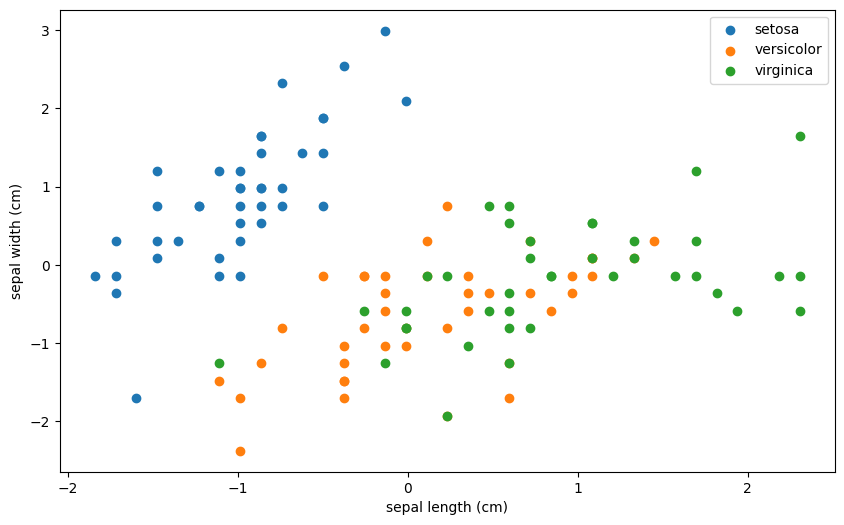

In [9]:
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_train))):
    plt.scatter(X_train_2d[y_train == i, 0], X_train_2d[y_train == i, 1], label=iris.target_names[i])

# Criar uma grade para visualizar a fronteira de decisão
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.legend()
plt.show()